In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure folders exist
os.makedirs("data", exist_ok=True)
os.makedirs("figures", exist_ok=True)

print("✅ Folders ready:", os.listdir())


✅ Folders ready: ['data', 'figures', '.ipynb_checkpoints', 'kalman_filter_tracking.ipynb.ipynb']


In [20]:
# Measurement matrix: we only observe x and y
H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

# Sensor noise standard deviation in x,y (tune this)
meas_std = 0.5  # try 2.0 later to make it harder
R = np.array([
    [meas_std**2, 0],
    [0, meas_std**2]
])

measurements = []
rng = np.random.default_rng(42)
for k in range(T):
    z_true = H @ true_states[k]
    noise = rng.normal(0, meas_std, size=2)
    z_noisy = z_true + noise
    measurements.append(z_noisy)
measurements = np.array(measurements)


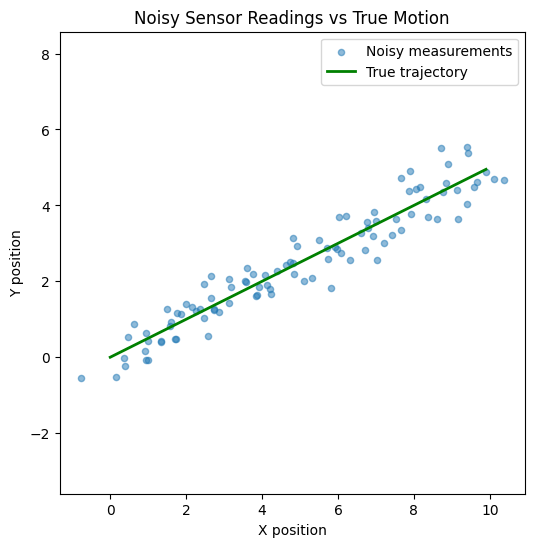

In [21]:
H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

meas_std = 0.5
R = np.array([[meas_std**2, 0], [0, meas_std**2]])

rng = np.random.default_rng(42)
measurements = []

for k in range(T):
    z_true = H @ true_states[k]
    noise = rng.normal(0, meas_std, size=2)
    z_noisy = z_true + noise
    measurements.append(z_noisy)
measurements = np.array(measurements)

plt.figure(figsize=(6,6))
plt.scatter(measurements[:,0], measurements[:,1], s=20, alpha=0.5, label="Noisy measurements")
plt.plot(true_states[:,0], true_states[:,1], 'g-', linewidth=2, label="True trajectory")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("Noisy Sensor Readings vs True Motion")
plt.legend()
plt.axis("equal")
plt.show()


In [22]:
# Initial estimate
x_hat = np.array([0.0, 0.0, 0.0, 0.0])
P = np.eye(4)

# Process noise covariance (small acceleration noise)
accel_std = 0.2
q = accel_std**2
Q = np.array([
    [0.25*dt**4, 0,          0.5*dt**3, 0         ],
    [0,          0.25*dt**4, 0,         0.5*dt**3 ],
    [0.5*dt**3,  0,          dt**2,     0         ],
    [0,          0.5*dt**3,  0,         dt**2     ]
]) * q


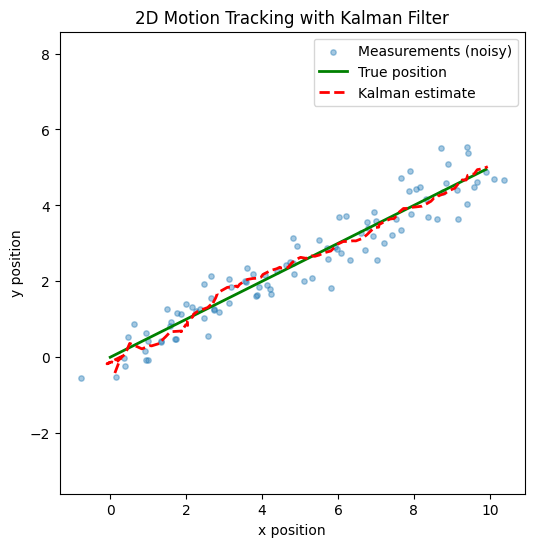

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(measurements[:,0], measurements[:,1], s=15, alpha=0.4, label="Measurements (noisy)")
plt.plot(true_states[:,0], true_states[:,1], 'g-', linewidth=2, label="True position")
plt.plot(x_hats[:,0], x_hats[:,1], 'r--', linewidth=2, label="Kalman estimate")
plt.xlabel("x position")
plt.ylabel("y position")
plt.title("2D Motion Tracking with Kalman Filter")
plt.legend()
plt.axis('equal')
plt.show()


In [23]:
I = np.eye(4)
x_hats = []

for k in range(T):
    # 1. Predict
    x_hat_prior = F @ x_hat
    P_prior = F @ P @ F.T + Q

    # 2. Update
    z = measurements[k]
    y_residual = z - (H @ x_hat_prior)
    S = H @ P_prior @ H.T + R
    K = P_prior @ H.T @ np.linalg.inv(S)

    x_hat = x_hat_prior + K @ y_residual
    P = (I - K @ H) @ P_prior

    x_hats.append(x_hat)

x_hats = np.array(x_hats)
print("✅ Kalman filter finished.")


✅ Kalman filter finished.


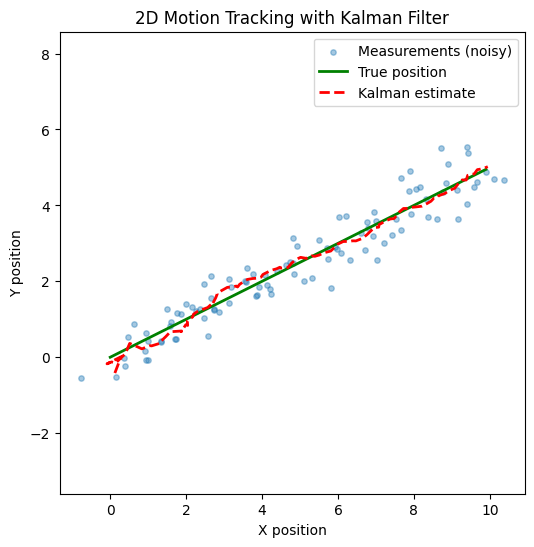

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(measurements[:,0], measurements[:,1], s=15, alpha=0.4, label="Measurements (noisy)")
plt.plot(true_states[:,0], true_states[:,1], 'g-', linewidth=2, label="True position")
plt.plot(x_hats[:,0], x_hats[:,1], 'r--', linewidth=2, label="Kalman estimate")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("2D Motion Tracking with Kalman Filter")
plt.legend()
plt.axis('equal')
plt.savefig("figures/kalman_trajectory.png", dpi=300)
plt.show()


Mean error (measurement): 0.558
Mean error (Kalman estimate): 0.176


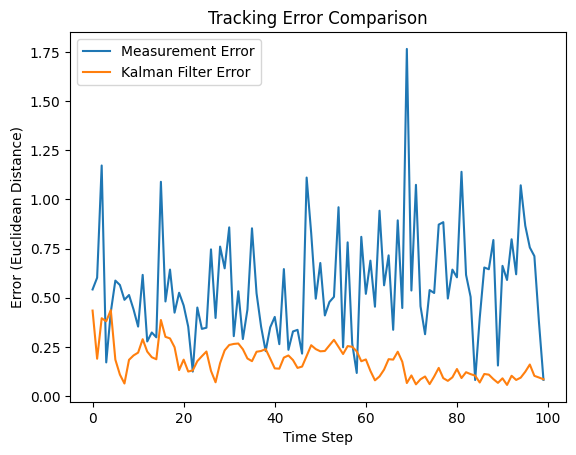

In [27]:
pos_err_meas = np.linalg.norm(measurements[:,0:2] - true_states[:,0:2], axis=1)
pos_err_kf   = np.linalg.norm(x_hats[:,0:2] - true_states[:,0:2], axis=1)

print(f"Mean error (measurement): {pos_err_meas.mean():.3f}")
print(f"Mean error (Kalman estimate): {pos_err_kf.mean():.3f}")

plt.figure()
plt.plot(pos_err_meas, label="Measurement Error")
plt.plot(pos_err_kf, label="Kalman Filter Error")
plt.xlabel("Time Step")
plt.ylabel("Error (Euclidean Distance)")
plt.title("Tracking Error Comparison")
plt.legend()
plt.savefig("figures/kalman_error.png", dpi=300)
plt.show()


In [28]:
data_to_save = np.hstack([
    true_states[:, :2],       # true positions
    measurements[:, :2],      # noisy measurements
    x_hats[:, :2]             # Kalman-filtered positions
])

header = "true_x,true_y,meas_x,meas_y,kalman_x,kalman_y"
np.savetxt("data/kalman_data.csv", data_to_save, delimiter=",", header=header, comments='')

print("✅ Data saved to 'data/kalman_data.csv'")
print("✅ Figures saved in 'figures/' folder.")


✅ Data saved to 'data/kalman_data.csv'
✅ Figures saved in 'figures/' folder.



### Discussion

- The Kalman Filter significantly reduces measurement noise and provides smoother position estimates.
- Even though the sensor only observes position, the filter successfully estimates velocity.
- When measurement noise increases, Kalman smoothing becomes even more valuable.
- The difference between the green (true) and red (filtered) lines shows prediction accuracy.

**Applications:**
- GPS/IMU fusion for mobile robots  
- Drone flight control  
- Object tracking in video  
- Vehicle localization and navigation systems
